In [4]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('../../cache/output/logs/all_warm_gpt2_enron_aux1.0_fulladapter_warm_pe3_fNone_pNone_plr0.0001/metric.json', 'r') as f:
    data_ours = json.load(f)
    
with open('../../cache/output/logs/all_None_gpt2_enron_aux1.0_fulladapter_None_pe3_fNone_pNone_plr0.0001/metric.json', 'r') as f:
    data_benign = json.load(f)
    
epoch = 5
benign_loss_att = data_benign['ft'][str(epoch-1)]['mia_metric']['loss_mia']['roc_curve']
benign_init_ref = data_benign['ft'][str(epoch-1)]['mia_metric']['ref_model_mia']['roc_curve']
benign_full_ref = data_benign['tune_ref']['ref_model_mia']['roc_curve']
ours_basic = data_ours['ft'][str(epoch-1)]['mia_metric']['ref_model_mia']['roc_curve']

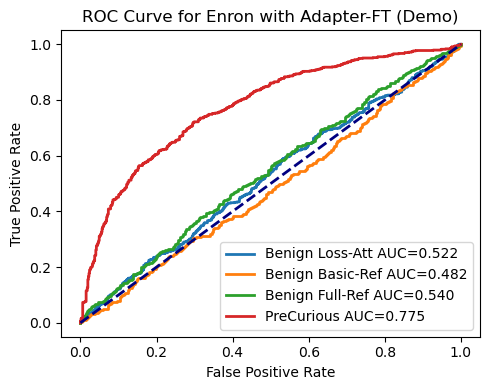

In [5]:
DATA='Enron'
PEFT='Adapter'

fig, axs = plt.subplots(1, 1, figsize=(5, 4))

palette = sns.color_palette('magma')
sns.set_palette(palette)

data_dict = {
    'Benign Loss-Att': benign_loss_att,
    'Benign Basic-Ref': benign_init_ref,
    'Benign Full-Ref': benign_full_ref,
    'PreCurious': ours_basic,
}

color_map = {wd: palette[i % len(palette)] for i, wd in enumerate(data_dict.keys())}

for name, roc_curve in data_dict.items():
    color = color_map[name]
    roc_auc = roc_curve['roc_auc']
    axs.plot(roc_curve['fpr'], roc_curve['tpr'], lw=2, label=f'{name} AUC={roc_auc:.3f}') 

axs.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs.set_xlabel('False Positive Rate')
axs.set_ylabel('True Positive Rate')
axs.set_title(f'ROC Curve for {DATA.capitalize()} with {PEFT.capitalize()}-FT (Demo)')
axs.legend(loc="lower right")

# Finally, display the plot
plt.tight_layout()
plt.show()